# Exercise 3: Introduction to Web Scraping in Python

## Introduction

Ok, so now we know how to use Jupyter Notebooks and have covered the basics of the python language. It's now time to put those skills to some practical use! What I want to introduce today is an approach known as web scraping. Webpages can be thought of as archives containing huge amounts of information that is relevant for many research projects. However, this information is very difficult or impossible to analyse in the format that it is stored on the internet. In simple terms then, web scraping is the process of extracting large amounts of information that is stored in webpages and processing this information in such a way that makes it easier for us to analyse. 

By way of example, we are going to imagine that we undertaking a research project where we are interested in finding out if there is a relationship between the area-level availabillity of tobacco products and area-level measures of health. In other words, an analysis very similar to this one:

https://tobaccocontrol.bmj.com/content/tobaccocontrol/25/1/75.full.pdf

In order to do this, the first thing we need to do is acquire data on the locations of all of the tobacco retailers in Scotland. Luckily for us, the Scottish Government has this information recorded in the Scottish Register of Tobacco and Nicotine Vapour Product Retailers. The bad news is that it is only available on their website here:

https://www.tobaccoregisterscotland.org/search-the-register/?Name=&Postcode=&LocalAuthority=&BusinessType=&ProductType=&PremisesStatus=

The website is basically an archive list of all the tobacco retailers in Scotland and includes information on the name of the retailer, the address and postcode and whether it is currently active. Some of you may remember back to fundamental methods in geography, when you were doing a GIS practical... one of the datasets you were using in that practical came from the information contained in this website. Today we are going to gather this data for ourselves, process it and turn it into a format that will allow us to answer our research question. 

As we do this, you are going to also learn lots more of the fundamental principles of python programming at the same time including lists and methods and many other things. Be aware that many of the techniques are quite advanced and you will definitely find them challenging... Don’t worry though, this practical is designed to introduce you to what is possible rather than teach you everything (which is much too ambitious for a short workshop like this!).



## Part 1: Getting familliar with the website we want to scrape

### What do we want from the web page?

So the first part of the process is to take a good look at the website that we are actually going to be scraping. So take a few minutes to click the link above to explore the register.

<b><i>Exercise 1: Visit the website and look at the information it contains for each premise. Look and see how many records there are in total. How might we extract all of this information given its size and how it is spread over multiple pages? One approach to get all of this data would be to just copy and paste it all, is this practical do you think? For all 630-odd pages?</i></b>

Now that we have taken a look at the webpages we can start to see the problem. How do we take all of the information on that webpage and turn it into something useful for analysis, something that looks like the nice spreadsheet in the image below:

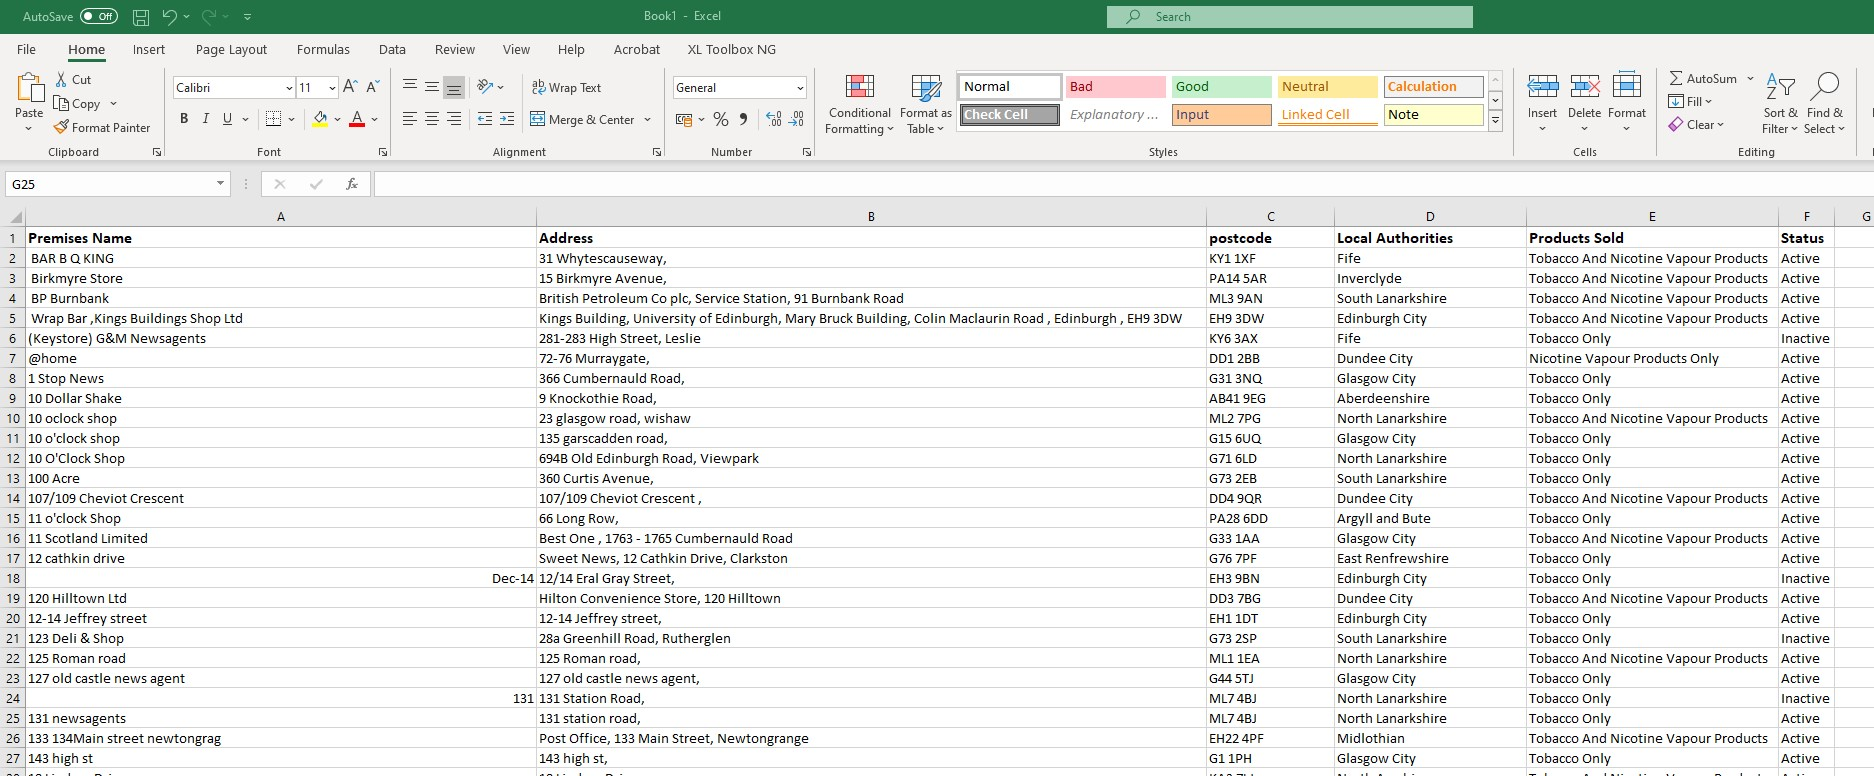


#### Understanding how web pages work

To start to understand how we might use python to do this, we need to understand how web pages are put together, in particular how HTML works (HTML stands for HyperText Markup Language, AKA the language of the internet!). HTML is basically a bunch of codes and tags that tells a web browser (like Chrome or Safari etc) how to display a web page. Text that is placed in these tags will look different in our web browser depending on the tag that is used. So to start let's take a look at the HTML of our tobacco register web page. We can do this from within the web browser. This stage will depend on the browser that you have on your computer. If you use chrome as I do follow these steps:

1. Open up the the webpage again
2. Click the "search" button (no need to add any filters unless you want to)
3. When the page has loaded right-click anywhere in the page and then click "view page source"
4. A new page should open showing the raw HTML, which should look something like this...

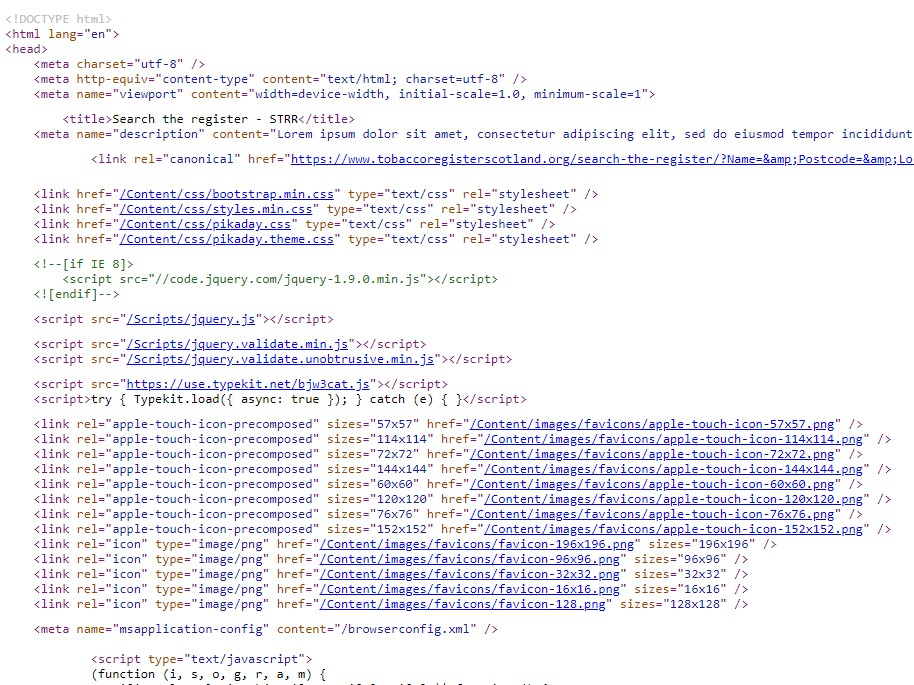


If you are looking at this and thinking what on earth does all this mean, then don't worry! We are not supposed to! This HTML code is designed to be read by computers, not humans and so it wont make any sense to us. 

The most important thing to recognise is the HTML tags themselves. You can spot the tags because thay are marked with < or > symbols. For example, see if you can find the tag `<b>` anywhere in the HTML. This tag is used to display text in bold. For more information on HTML tags and to see how different tags do different things, see here: https://developer.mozilla.org/en-US/docs/Web/HTML/Element 

Crucially for us, the HTML tags can also be used to find and extract certain pieces of information from the page. Scroll down the page until you get to line "368" (the line numbers are at the left of the page). Here you can see where the information that we want is stored, and the tags that contain that information! All we need to do is figure out which tags are of interest to us. <b>Look closely and you can see that the addresses and other information are stored between tags labelled `dd`. Remember this tag for later!</b>

Our next task is to see how we can use python to automate the process of extracting this information based on these html tags... 

## Part 2: Back to Python...

### Python packages

Before we get started, the first thing we need to do is import some packages package to our python session. These packages are part of the built-in functionality in python. 

Note, this command will not return any output.

In [ ]:
import time
import os
import requests
import html

Python has loads of these "built-in" packages like the ones above. But one of the really amazing and useful things about python is the literally thousands of different add-on packages (called "libraries") that it has access to. These libraries have been written by clever python programmers and add a whole range of functionality to the basic functions of standard python. Luckily for us, one particularly clever group of programmers have written a library called "beautiful soup" which does exactly what we need.

Because this package is not part of standard python we would normally have to install it. Luckily noteable has already installed it for use with jupyter notebooks so we dont need to. We just need to import it as below.

In [ ]:
from bs4 import BeautifulSoup

### Importing our webpage into python
Now we have the libraries we need imported, we can now start on the process of scraping the information we need. 

The first thing we need to do is get the URL for the website. We can copy this from our web browser. 

We will assign the actual URL address to a string variable called "URL". 

Note: the URL is very long to I have split it into different lines with the "\" character to make it easier to read.

In [ ]:
URL = 'https://www.tobaccoregisterscotland.org/search-the-register/?Name=&Postcode=&LocalAuthority=&BusinessType=&ProductType=&PremisesStatus=&page=1'
print(URL)

Look at the last part of the URL where it says "&page=1". This URL is only going to point to page 1 of the over 600 pages that there are in total. We could change this number to pull in a different page e.g. "&page=100" would pull in page 100. Later in the practical we will explore how we deal with this using loops to repeat sections of code over all of the pages automatically. But for now leave the URL to point to page 1.

Now we have the URL, we need to tell python to go to that URL and retrieve the HTML content and store it. We do this using the code below... 

In [ ]:
page = requests.get(URL)

Thsi code wont output anything but what is it code doing? Well, it is quite simple really. We use the "requests" library (that we imported earlier) and use the .get method associated with this library to "get" the URL string from the URL variable we specified earlier. The code retrives this HTML and assigns it to a new "requests" object called "page".

We can now view the content of this page variable with by using the `.content` method associated with the request object. 

In [ ]:
print(page.content)

As you can see this is a real mish-mash. Because it is a "requests" object, we can't do very much with it. We need to instead turn it into a beautiful soup object which means we can then use all of the many beautiful soup methods to help us make sense of it. We will do this in the next section.

<b>Exercise: Find another webpage, it can be anything you like, but make sure it contains something that you might want to extract (e.g. maybe a news article page, or a blog page, but anything will do really!). Using the code above as a template, see if you can work out how to extract the HTML contents of the page and print the contents like we did above.

HINT! Don't forget to call your new object something different to "page", otherwise you will overwrite the existing "page" object and we need that for later!</b>

### Using beautiful soup to make sense of the HTML

Run the code below to create our beautiful soup object.

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')

Here, we have created a new beautiful soup object called "soup". We gave two additional pieces of information when we created the object (the things in brackets, which in technical python speak are called arguments). Firstly, we are saying that the new soup object should use the contents of our "pages" object (hence the page.content). Secondly, we tell beautiful soup that the contents of pages is HTML format (hence 'html.parser')

Now that we have a beautiful soup object, we can do a bunch of cool stuff with our HTML content. Lets look at a couple of these...

In [ ]:
print(soup.prettify())

This is the "prettify" method. It is really useful because it takes the HTML and formats it in the correct way (in other words, the same as it would look when looking at the source code in the browser). This can make the HTML a little easier to read. 

But this isnt the most useful method in beautiful soup. The most useful methods are those that allow us to search for certain html tags and then extract the text that is contained in those tags.

In [ ]:
items = soup.find_all('dd')
print(items)

So what is this code doing? Let's break it down, bit by bit, as this really is the crux of our web scraping journey! Firstly, we have created a new object called items. As you can see from the output, this object contains all of the information from the HTML that we are interested in, namely the address, premise name, whether it is active or not and so on. How did we do this? Before we break this down, remember earlier in the second practical notebook, when we talked about programing syntax, and in particular how often you would see the "object.action" code structure. Pretty much everythign we are doing here follows this pattern!

So, soup.find_all('dd') can be translated into "find all of the `dd` tags and the content of those tags". In other words, soup is the object and find_all is the action or the method. Just like before, we are supplying arguments in brackets, in this case these arguments are the tags that we are searching for. So we could search for other tags if we wanted, we would just add these tags to the brackets. One example of this might be if we wanted to keep only the name of the attribute (i.e. "Address" or "Products Sold"). For this we would use the following code:  

In [ ]:
field_names = soup.find_all('dt')
print(field_names)

Now you can see that only the content of the `<dt>` tags have been kept..

You can also search for multiple tags. So lets say we wanted to keep both `<dt>` and `<dd>` tags we would do the following:

In [ ]:
soup.find_all(['dd', 'b'])

Now you can see that all of the information has been retained. 

<b>NOTE: when specifiying more than one tag to search for you need to place it within a list i.e. `['dt', 'dd']` within the brackets.</b>

We have only just scratched the surface here in terms of what `Beautiful Soup` can do. For more information on the wiuder functionality of the package see here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<b> Exercise: Go back to the page object that you created yourself in the earlier exercise. Use the various beautiful soup methods on your own page. See if you can find any HTML tags that are of interest and see if you can exrac the contents. You may not be able to do this easily but just have a play and see how you get on!</b>

## Part 3: Using list and string methods to clean up our data 

We have made real progress! We have now extracted all of the information we need from the webpage and stored it in a list! 

But in its current state, it is not very useful. For a start it is full of HTML tags which we dont need any more! It also needs to be converted into a recognised spreadsheet format. Luckily, Beautiful Soup has a bunch of really useful methods to help us manage this task and python can deal with the rest really easily.

So this is the point where we get to use all of those crazy list methods that we have just learned about. 

Remember that all of the HTML that we have scraped is contained in a new object called `items`. This object is a beautiful soup object, technically its a `bs4.element.ResultSet`. 

We can verify this by using the `type()` function:

In [ ]:
type(items)

This may look confusing but it is basically the same as a standard python `list` object but with some cool additional methods and functions to go along with it. In other words we can use our standard python list commands to look at different characteristics of the list. Let's look at the length of our list:

In [ ]:
len(items)

This tells us that our list has 120 individual items in it. Going back to look at the original webpage we can see that there are 20 different premises listed on each page (13330 premises in total). So if there are 120 items that must mean each premise has 6 separate characteristics in the list (i.e. 120/20). This makes sense if we look at the webpage again as we can see 6 distinct pieces of information for each premise; Address, Local Authority, Business Type, Products Sold, Company Name, and Status.

So, let's look at the first six items in our scraped items list. <b>Remember, when pulling items from a list, the first item is zero! So the 2nd item would labelled "1" and so on!</b>

In [ ]:
print(items[0])
print(items[1])
print(items[2])
print(items[3])
print(items[4])
print(items[5])

We can see that each item in this list is a separate piece of information. `items[0]` is the address, `items[1]` the local authority, `items[2]` the type of premise, `items[3]` what products it sells, `items[4]` the name of the premises and `items[5]` where it is currently active or not.

<b>Exercise: Print these same characteristics but this time for the next premise in the list. Hint: The list doesnt go back to zero for each premise...</b>

Remember back to our discussion of loops! Lets use them for what they do best, repeating code... 

Let's print all the items individually using a loop:

In [ ]:
for item in items:
    print(item)

That is a lot of output! But at least now we can see all of the items in the list. In other words all of the premises from page 1 of the search results.

However, what is making this a little tricky is that the HTML tags are still there i.e. (the `<dd>` symbols). Our next task is to clean our data by removing these. We can do this using a method from beautiful soup called the `contents` method. This method strips out all of the HTML and leaves behind only the contents of the tag. 

Lets do this for the first item in our `items` list (notice that the code specifies the first item from the list with the `[0]`)

In [ ]:
print(items[0].contents)

Excellent! Now we have a nice clean `string` that we can work with. But only for one item in our list, which isn't much use to us. 

We need to figure out how to do this for all of our items. 

Yup, you guessed it, it's time for another loop!

In [ ]:
cleaned_items = []
for item in items:
    cleaned_items.append(item.contents[0])
print(cleaned_items)

Ok, let's break that down a bit as it is a lot to take in at once. The first thing to consider is that all of this code is nothing that we haven't already encountered with lists and different list methods. Let's look at it line by line: 

- Line 1: The line `cleaned_items = []` is just saying "Make an empty new list called `cleaned_items`"
- Line 2: `for item in items:` is where our loop starts. All this is saying is take every item in the original items list and do something with it using the placeholder `item`.
- Line 3: This is where things get funky. Here is what it does... for each item in the original items list first take out the HTML tags from that item using (`item.contents[0]`) and then add it to the new blank list using `clean_list.append`. Because this a loop this line 3 process then gets repeated for each item.
- Line 4: When the last item has been completed it exits the loop and executes the last line which is just to print the new list object.

Line 3 is the most interesting. What we have done here is known as "function chaining" which is basically the process of "chaining" together multiple functions in one command. In other words taking the output of one function and using it as the input of another function. In this instance we are taking the output of the `contents` function and passing it as an input into the `append` function. Function chaining can get pretty complex and difficult to follow and read, particularly when you have lots of them e.g. `headers.append(list.select('dt')[i].get_text().replace(':', ''))` is a good complicated example!

It is however an important concept in all programming and is used extensively in the "R" software for example. R actually handles function chaining in a much more straightforward and readable way and we will cover that in a later practical.  

One last thing you might be wondering is why is there a `[0]` at the end of the `(item.contents[0])` command? This is because sometimes the loop item may be another list in which case you can specify which item you want to keep from that list. In this case each item itself contains only one item, hence we ask for `[0]`.

That is some fairly complex code but hopefuly it makes sense and you can see the real power of these list methods, the power of chaining functions and how these can be combined powerfully with packages like beautiful soup.

So now we have all the information we need, or do we? You may have noticed by now that the name of the premises is missing from our list. We have the "Company name" but not the actual name of the shop or store. Often they are similar but many times they are not (look for example at the Kings building store, which is called "Wrap Bar ,Kings Buildings Shop Ltd"  (which many of you may recognise!)) but which has a company name of "Edinburgh University Students Association"). 

<b>Can you think why this is missing?</b> 
<b>HINT: Look at the structure of the HTML again.</b>

It's because this part of the information is not in a `<dd>` tag so wasnt included in our results when we searched only for `dd` tags. If we look closely at the HTML again we can see that this information is actually in a `<b>` tag because as you can see on the page it is highlighted in bold. Luckily, nothing else on the page is in bold so just searching for these `</b>` tags will give us what we need easily. Combined with some function chaining we can get this in a nice clean format as well with: 

In [ ]:
premise_names = []
for item in soup.find_all('b'):
    premise_names.append(item.contents[0])
print(premise_names)

Note this code is the same as the loop we did before except for one key difference. In the second line we use `soup.find_all('b'):` instead of just the name of an existing list e.g. like our `items` list. Because the output of `soup.find_all('b'):` is a list, we can use it as an input in the loop function (i.e. instead of creating a new list object and using that object name). Clever huh? 

Ok, so now we have all the information we need spread across two objects. Our list of premises and their characteristics in `cleaned_items` and the premise names in a list called `premise_names`. Great! 

But...

Remember that we want this to be organised into a spreadsheet format. In other words, we want it in a format where each row corresponds to a single premise and each column is a characteristic of that premise (remember the spreadsheet image at the top of the notebook). We want it to look like something like this:

|Name |Address   | Local Authority | Business Type | Products Sold | Company Name | Status |
|-----|-----------|-----------------|---------------|---------------|--------------|--------
|BAR B Q KING| 31 Whytescauseway, KY1 1XF|Fife|Other Catering|Tobacco And Nicotine Vapour Products|BAR B Q KING|active|
|Birkmyre store|15 Birkmyre Avenue, PA14 5AR|Inverclyde|Convenience Store|Tobacco And Nicotine Vapour Products|Birkmyre store|Active

At the moment, everything is just in one long list.

In order to format the data correctly, what we really need is everything to have its own list. In other words we need everything to be like the `premises_name` object so that we have separate lists for all of the different fields (all of the addresses, all of the local authorities etc etc).

Again, using python list methods makes this really easy. Lets try it with the "status" field first:

In [ ]:
statuses = cleaned_items[5::6]
print(statuses)

Ok, so what is going on here in line 1 of the code above? The first bit is easy we are just creating a new list called `statuses`. This new list is based on a subset of items from our larger `cleaned_items` list. The `[5::6]` code is the important part. It can be translated as... "starting at the 6th item in the `cleaned_items` list, grab this item, miss out the next 5 items and grab the next one". In other words because we know the status field appears every 6th item, we can use the `[x::y]` notation to grab every sixth item which returns a list of all of the status fields of each premise.

Let's do this for all of the fields next:

In [ ]:
addresses = cleaned_items[0::6]
local_authorities = cleaned_items[1::6]
types = cleaned_items[2::6]
products_solds = cleaned_items[3::6]
company_names = cleaned_items[4::6]

for item in addresses, local_authorities, types, products_solds, company_names:
    print(item)

Notice how the first number in the square brackets changes but the second does not, reflecting the different bits of informatio nwe want...

Now we have all of the fields each with their own list. However, there is one remaining problem...

At the moment, the `addresses` list includes both the text address and the postcode in one item. When we come to link this data to other datasets (in a future practical) we will do so using the postcode field, meaning that the postcode needs to be in a separate field. At the moment each address item looks something like this:

`31 Whytescauseway,  KY1 1XF`

And we need it to look like this:

`31 Whytescauseway`

and this:

`KY1 1XF`

This is actually quite a tricky thing to do in coding terms but let's do one as an example below:

In [ ]:
#First print the full address
print(addresses[0])

#and now split out the postcode
print(' '.join(addresses[0].split()[-2:]))

We can see that it has now separated out the address from the postcode as we wanted. 

So what is going on here? Well, we are using two of pythons built-in string methods: `join()` and `split()`.

Let's do it one step at a time

First lets do the `split()` step. 

What `split()` does is it takes items in a string (note, not a list but a string!) and splits them into separate items...

In [ ]:
postcode_parts = addresses[0].split()[-2:]
print(postcode_parts)

You can see that we have asked python to look at the string associated with addresses[0] i.e. `31 Whytescauseway,  KY1 1XF` and using `[-2:]` have aked it to keep only the last two items `['KY1', '1XF']`. 

You can see that this has returned a list of two separate strings; a first and a second part of the postcode. Now what we need to do is combine these two items. We do this using the string method `join()`. Join basically takes items in a list and joins them together...

In [ ]:
postcode_combined = ' '.join(postcode_parts)
print(postcode_combined)

What this code, `' '.join(postcode_parts)`, is doing is basically saying "join the items in `postcode_parts` and put a `' '` (i.e. a blank space) between the items. We could have put a different character between the items if we wanted, e.g. a `|`

In [ ]:
postcode_combined = '|'.join(postcode_parts)
print(postcode_combined)

<b>IMPORTANT SIDENOTE:</b> There is a technical term for the use of characters to split strings known as a `delimiter`. A delimiter is any character in a string that is used to signify where one bit of information ends and the next begins. In the first example we use a single whitespace `' '` and in the second we use a `|`. This is a really important concept in programming because it ensures that the computer knows how to "read" the information. It is particularly important when creating data files. YOu wil often see data files saved as `.csv` files for example. CSV stands for "comma separated values" which means thet each individual bit of data is separated by a `,`. In other words the `,` is a delimiter. In reality, CSV files can use any delimiter that you want, as long as it is consistent. We will see this much more clearly later in the practical when we get to the part where we create our own CSV file containing all of the data we have scraped from our website.  

Anyway, back to our task of splitting the postcode into a separate field...

Putting both the `split()` and `join()` parts together with some `function chaining` we end up with the full code to separate the postcode e.g.:

`print(' '.join(addresses[0].split()[-2:]))`

Of course this has only done what we wanted for one of the adress items in the addresses list. So we need more looping and more function chaining to do it for all of the addresses and postcodes:

In [ ]:
postcodes = []
for address in addresses:
    postcodes.append(' '.join(address.split()[-2:]))
    
print(postcodes)

We got there! I'll bet you are all a bit bewildered by this which wouldnt be surprising. Wrangling with string information like this is one of the more difficult tasks in programming and data science. It takes a lot of practice and lots of concentration. So basically, dont worry if this seems too difficult at this stage!

Let's remind ourselves where we have got to. We now have separate lists for each field of information contained on the original webpage, including separating out the postcode from the overall address.



In [ ]:
for item in premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses:
    print(item)

In the next section we are going to combine these lists into a single spreadsheet file (a CSV) and then save this file into a format that allows us to open in lots of other programs (including in R, Excel etc). 

## Part 4: Creating a nicely formatted spreadsheet

In this next section we are going to combine these lists into a single spreadsheet file (a CSV) and then save this file into a format that allows us to open it in lots of other programs (including in R, Excel etc) for our statistical analysis.

It is worth noting that the steps we are taking here are very general and are almost exactly the same for any data file creation task not just in python and not just for web scraping. For example, the R code to do this would include very similar steps.   

The first thing we need to do is import another package called `csv` as we need this to produce our file at the end. We do this just like with the beautiful soup library using the import command. For more information and documentation on the other functions available in the general `csv` package see here: https://docs.python.org/3/library/csv.html

In [ ]:
import csv

The next thing we need is to create our column headers which will be the first row in our file and will contain the column names. We do this by creating a list, making sure the order of the columns makes sense.

In [ ]:
headers = ['Name', 'Address', 'Postcode', 'Local Authority', 'Type', 'Products Sold', 'Company Name', 'Status']

Now we are ready to create our file which we do in two stages:

- Stage 1: Create an empty file that contains only the column headers we want
- stage 2: Append to (in other words "add to") this file all of our premises row by row. 

To do this, we will use some code we havent really come across up to now...

When we are working with files in python (either creating new files or reading and writing existing ones) it is important that we are careful with opening and closing the file properly. If we dont we run the risk of corrupting the file through something like trying to write to an open file twice or some other operation that may harm the integrity of the file.

So lets start with stage 1. We do this using the code structure below:

In [ ]:
with open("TobaccoPremises.csv", "w") as filename:
    our_writer = csv.writer(filename, delimiter = "|")
    our_writer.writerow(headers)

Let's look at this line by line. The first line `with open('ScrapedTobaccoPremiseData.csv', "w") as f:` is basically saying "open a new file called `'ScrapedTobaccoPremiseData.csv'` and with that file do some stuff". The `file` part is basically the placeholder for the later operations, in exactly the same way as we would do in a loop. Note the `:` at the end to signify to python that the next block of code should use and refer to the `file` placeholder name which itself refers to the filename we specified `ScrapedTobaccoPremiseData.csv`. The last thing we can see in this first line is the `"w"` argument after the filename. This argument is known as the "file mode" and it tell python how to work with the file. There are basically three options for this argument: `"w"`, `"r"` or `"a"`. `"w"` means the file should opened in `write mode`, `"r"` means the file should be opened in `read mode` (basically just read but dont edit the file, not much use to us here!) and the `"a"` means we should open the file in `append mode` (more on that later).   

The next two lines are new to us. We havent used these commands before and they relate to the `writer` functions from the `csv` package that we imported earlier. In this second line you can see `our_writer = csv.writer(file, delimiter ='|')`. This is how python and the writes files safely, by creating what we call a `writer` object using the `writer` function from the `csv` package (hence `csv.writer`), in this case we have called our writer object `our_writer`. We can check that this is the case by checking the type of object... 

In [ ]:
type(our_writer)

When we create the writer object we also have to supply some arguments in the brackets `(file, delimiter ='|')`. We know what `file` is, it is the `string filename` we created when we started the loop i.e. `ScrapedTobaccoPremiseData.csv`. The second part `delimiter ='|'` should be fammiliar to us given the discussion of "delimiters" a few cells earlier. Basically this is where we specify how we want to "delimit" our data, in this case by inserting a `|` symbol.

<b>Exercise: Can you think why we would need to use a `|` for our delimiter rather than a `,`?</b>
<p></p>
<b>HINT: Think about the content of the address field, for example this one:</b>
<p></p>
`183-187 High Street, Kirkcaldy`
<p></p>
<b>Why would a comma delimiter not be suitable here?`</b>


Ok, so now the last part of the `writer` code is to actually write the data to the `ScrapedTobaccoPremiseData.csv` file. This is what the `writerow` method does in `our_writer.writerow(headers)`. It essentially writes a row of data according to whatever we supply in the brackets, in this case `headers`. In other words this whole chunk of code:

`with open('ScrapedTobaccoPremiseData.csv', "w") as file:
    our_writer = csv.writer(file, delimiter ='|')
    our_writer.writerow(headers)`
    
Basically creates a `csv` file with a single row of column names. If you go back to your notebook home screen you should now see the file has been saved there. Go ahead and click on it and you should see the file open in a window with all of your column names in a row, separated by a `|` symbol.  

Now we need to move onto stage two of creating our file. This is more tricky because unlike the column names, our actual premise information is organised into lists by field, rather than by premise. In other words like this:

In [ ]:
for item in premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses:
    print(item[0:2])

Rather than for example as we want in our spreadsheet, like this:

|Name |Address   | Local Authority | Business Type | Products Sold | Company Name | Status |
|-----|-----------|-----------------|---------------|---------------|--------------|--------
|BAR B Q KING| 31 Whytescauseway, KY1 1XF|Fife|Other Catering|Tobacco And Nicotine Vapour Products|BAR B Q KING|active|
|Birkmyre store|15 Birkmyre Avenue, PA14 5AR|Inverclyde|Convenience Store|Tobacco And Nicotine Vapour Products|Birkmyre store|Active

This is another very common task in data science and is part of what we call <b><i>reshaping</i></b> our data to make it fit the format we need it in. there are often many different ways to reshape data depending on the particular questions you are wanting to answer.

Luckily, python has a very straightforward way to turn lists into rows of data that we can write to our `ScrapedTobaccoPremiseData.csv` file using the the `zip()` function. This does exactly as the name suggests it <i><b>zips</b></i> lists together like a zipper. 

We do this below...

In [ ]:
rows = zip(premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses)
for row in rows:
    print(row)

This is an incredibly useful and powerful function in python. As you can see with one line of code: 

`rows = zip(premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses)`

We have a created a `zip` object called `rows` which contains a set of individual rows of data with each row containing the different bits of information for each premise. 

There is however one important thing to remember when using the `zip()` function... To illustrate this, let's run the print rows code again: 

In [ ]:
for row in rows:
    print(row)

You wil notice it doesnt do anything! This is because a `zip()` object is a special type of object known as an `iterator` (as in something to iterate or repeat). Iterators are only designed to be used once. In other words once you have looped through all of the items in an iterator once it is exhausted and cannot be used again, hence why we get no output from the above (because we have useed it already to print the rows i nthe previous code cell). This wil definitely catch you out, so be warned! 

The solution is to put the `zip()` object into a standard list which can be looped over as many times as you like...

In [ ]:
rows = list(zip(premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses))
print(rows)

Now we have a list where each item is a separate row of data (corresponding to each premise) that we can use as many times as we like!

We can now use the `rows` list object in a normal loop to write each row to our existing `ScrapedTobaccoPremiseData.csv` file.

We do this below using almost identical code to the code we used for the initial creation of our CSV file with the column headers. 

<b>Exercise: Take a look at the code below, in what way is it different to the code we used to first create the CSV file? HINT: there are a 2 or three key differences!</b>

In [ ]:
with open("TobaccoPremises.csv", "a") as filename:
    our_writer = csv.writer(filename, delimiter = "|")
    for row in rows:
        our_writer.writerow(row)

Once you have run the code above, take a look at your CSV file in the noteable homepage. You should now see that it is full of all of the data that we have scraped from page one of webpage!

At this point you are probably wondering "this is great, but I only have 20 records in my dataset. I need all 13332 results from the whole website!". 

You would be right! And this is where the magic of programming really shows itself..

Lets start by putting all of the code we have just explored in one cell so that we can look at it in its complete form. You will see I have added some comments (marked by `#` remember!) to explain what each step is doing as a recap. 

Before executing this cell, change the page number in the URL string itself. You will need to go to to where it says `page=1` and change the `1` to a `2`. <b>Note that I have split the string into separate lines using the `\` symbol to make it more readable.</b>

Go back to the tobacco retailers register webpage and navigate to page 2 using the links at the bottom of the page. Make a note of some of the records. 

Now run the cell and when it is finished (you should see a message printed out when it has!) look at the CSV it has created in your files area. You should see that it has pulled in all of the results from page 2! 

In [ ]:
#Specify the URL we want to scrape
#Note the string has been broken into different lines to make it easier to read.
URL = 'https://www.tobaccoregisterscotland.org/search-the-register/?\
Name=\
&Postcode=\
&LocalAuthority=\
&BusinessType=\
&ProductType=\
&PremisesStatus=\
&page=1'\

#Retrieve the contents of that URL
page = requests.get(URL)

#Take this content and turn it into a beautiful soup object
soup = BeautifulSoup(page.content, 'html.parser')

#Find all of the 'dd' html tags and place in a list called 'items'
items = soup.find_all('dd')

#Remove all of the HTML codes from the items
cleaned_items = []
for item in items:
    cleaned_items.append(item.contents[0])

#Obtain the missing premises names 
premise_names = []
for item in soup.find_all('b'):
    premise_names.append(item.contents[0])

#Create separate lists for each of the remaining fields
statuses = cleaned_items[5::6]
addresses = cleaned_items[0::6]
local_authorities = cleaned_items[1::6]
types = cleaned_items[2::6]
products_solds = cleaned_items[3::6]
company_names = cleaned_items[4::6]

#Do the same for the postcodes by extracting from the address field
postcodes = []
for address in addresses:
    postcodes.append(' '.join(address.split()[-2:]))

#Create a list of column headers for the spreadsheet
headers = ['Name', 'Address', 'Postcode', 'Local Authority', 'Type', 'Products Sold', 'Company Name', 'Status']

#Create a blank CSV file with only column names in it
with open("TobaccoPremises.csv", "w") as filename:
    our_writer = csv.writer(filename, delimiter = "|")
    our_writer.writerow(headers)

#Combine the lists into a zip list in preparation for writing to a CSV
rows = list(zip(premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses))

#Append the rows to the bottom of our csv
with open('TobaccoPremises.csv', "a") as f:
    writer = csv.writer(f, delimiter ='|')
    for row in rows:
        writer.writerow(row)

#Print a congratulatory completion message
print("Congratulations, this is now a web scraping python program!")

<b>Exercise: Now try some other page numbers to pull in. Do the same as before and change the URL in the right place in order to get the data from the page number you want and then run the code...</b>

You will notice something unhelpful about what we are doing and that is that each time we run the code we are overwriting the previous results. This is not what we want, we want to keep them all. Let's fix that next...

You have probably guessed by now that in order to get all of the results from the entire webpage, all we need to do is figure out a way to loop over every page and run the code for each page. this is actually really easy with some additional string methods and other functions that we havent used yet.  

the first of these is the string method `.format()`. This method allows us to insert characters in strings. Here is an example:

In [ ]:
name = "Tom Clemens"
print("Hello Python...Hello {}".format(name))

Hopefully it is fairly clear what the `format()` method does here. Notice that in the original string i.e. in the `"Hello Python...Hello {}"` text you can see the `{}` braces. These signify a placeholder and are used in conjunction with `.format(name))`. In simple terms this can be translated as "print the string and insert the contents of the variable `name` in the string where the `{}` is. Hence, when we run this, we get the full string message.

We could also just another raw string message in the brackets...

In [ ]:
print("Hello Python...Hello {}".format("Tom Clemens"))

But as we will see, it is much more useful being able to do this with a variable because we can tell our programme to update the variable, as we have been doing with the previous loop code. As an example...

In [ ]:
for number in range(0,10):
    print("Page Number {}".format(number))

Here we have combined the `.format()` method to print a page number in a loop. You will have noticed that I have also made used of the python `range()` function to do this. `range` is a very simple but very useful tool for us because it allows us to create a list of numbers within a certain range, and then loop over those numbers. The numbers in the `()` determine the range of numbers, and can be translated as "start at zero and stop at but do not include 10". More information on the range function can be found here: https://www.w3schools.com/python/ref_func_range.asp

Hopefully, some of you may be starting to see where we are going with all of this. What we want to do is basically loop through all of the code we created once for each page in the entire website. We can do this through a combination of the `string.format()` method and the `range()` function. 

We know that there are 13333 results in total on the entire website. We also know that there are 20 results per page. Dividing `13333/20` therefore gives us the total number of pages `666.65`. Rounding this up (because the last page doesnt have 20 results) we have 667 pages we need to query.

Lets write this into our code. The first thing we need to do is put the code where we create the column headers and the blank CSV file at the top, so that the loop can then add each new page of data to this blank file. 

Then you can see that on line 10 I have added the line `for PageNumber in range(0, 668):`. This is saying "repeat all of the code below the line inserting the `PageNumber` number into the URL each time". It will then run the whole block of indented code below this line for each page.

At the bottom on line 63 I have also added a `print()` statement that prints out a message saying `Page x completed` so we can keep track of it's progress as it works through all of the pages... <b>It will take roughly 6-7 mins to do all of the pages so I recommend pressing the stop button to exit the loop!</b> 

And that is it! Once it is completed you will have a large CSV file with all of the records (or as many as it got through before you stopped it) that you can download and examine in excel or any other stats package!

In [ ]:
#First create the headers we need
headers = ['Name', 'Address', 'Postcode', 'Local Authority', 'Type', 'Products Sold', 'Company Name', 'Status']

#Then create the blank file with the column headers
with open("TobaccoPremises.csv", "w") as filename:
    our_writer = csv.writer(filename, delimiter = "|")
    our_writer.writerow(headers)

#now start the loop
for PageNumber in range(0, 668):
    #Specify the URL we want to scrape
    URL = 'https://www.tobaccoregisterscotland.org/search-the-register/?\
    Name=\
    &Postcode=\
    &LocalAuthority=\
    &BusinessType=\
    &ProductType=\
    &PremisesStatus=\
    &page={}'\
    .format(PageNumber)

    #Retrieve the contents of that URL
    page = requests.get(URL)

    #Take this content and turn it into a beautiful soup object
    soup = BeautifulSoup(page.content, 'html.parser')

    #Find all of the 'dd' html tags and place in a list called 'items'
    items = soup.find_all('dd')

    #Remove all of the HTML codes from the items
    cleaned_items = []
    for item in items:
        cleaned_items.append(item.contents[0])

    #Obtain the missing premises names 
    premise_names = []
    for item in soup.find_all('b'):
        premise_names.append(item.contents[0])

    #Create separate lists for each of the remaining fields
    statuses = cleaned_items[5::6]
    addresses = cleaned_items[0::6]
    local_authorities = cleaned_items[1::6]
    types = cleaned_items[2::6]
    products_solds = cleaned_items[3::6]
    company_names = cleaned_items[4::6]

    #Do the same for the postcodes by extracting from the address field
    postcodes = []
    for address in addresses:
        postcodes.append(' '.join(address.split()[-2:]))

    #Combine the lists into a "zip" object in preparation for writing to a CSV
    rows = zip(premise_names, addresses, postcodes, local_authorities, types, products_solds, company_names, statuses)

    #Append the rows to the bottom of our csv
    with open('TobaccoPremises.csv', "a") as f:
        writer = csv.writer(f, delimiter ='|')
        for row in rows:
            writer.writerow(row)
            
    print("Page {} completed".format(PageNumber))

## Part 5: Summary

Let's have a quick recap of what we have learned in the practical:

1. How to use python to extract underlying HTML from a particular URL
2. How to use the beautiful soup library to help us sort through that HTML and extract information that we need
3. Use pythons list and string functions to query and rearrange this information
4. How to create new datafiles that can be used in a wide variety of software packages using the CSV package
5. How to write entire blocks of code and then use loops to repeatedly execute that code on multiple webpages

### Other things to think about!

#### Terms and conditions of webpages
One thing to be aware of when web scraping is that not all web pages allow web scraping and in some circumstances the legality is unclear. However a recent US court decision last year found the practice to be legal as long as the results were not used for commercial gain setting a precendent that permitted web scraping for the purposes of research. In almost all cases there will be no problem, however, it is still worth checking the terms and conditions of websites just to be on the safe side. 

Another important consideration is the effects that web scraping can have on the web servers that host the websites, especially if you are scraping a lot of information. When you vist a website in your browser it takes some time to load which helps prevent a succession of rapid requests for information. Howeverm when web scraping the process is much faster because the website is not actually loading, it is just passing on to you the raw HTML information. this means that it is quite easy to fire off a large number of queries in a very short period of time which for small and infrequently visited websites could overload the web server that is hosting the web page. this is actually an approach that hackers take to bring down websites by flooding the sites with so many requests and information that the seervers become overloaded and crash 9it is known as a distributed denial of service (DDOS) attack. This of course is very unlikely to be problem for us and our web scraping applications but it is worth being aware of.

#### More complex websites
This practical has demonstrated a really simple web scraping example from a really straightforward website. The information we needed was located in single HTML tags and was easy to find and extract. However, most moden websites are far more complex and use not just HTML but also other types of code including a language called javascript. Javascript is a modern web language that is used in conjunction with HTML to add dynamic elements to a webpage such as for example chat windows, pop-ups, adverts and other dynamic content. Methods to scrape some of these javascript websites requires a little more work and are more advanced than this practical but are possible nonetheless. There are many many tutorials on the web for just about any type of web-scraping activity. One example is scraping the comments from youtube videos. Because these comments often pop up dynamically on the page you need a different approach than using Beautiful Soup. A tutorial demonstrating this can be found here, though it may be difficult to follow without more python practice!: https://towardsdatascience.com/how-to-scrape-youtube-comments-with-python-61ff197115d4

The tutorial above uses a package called "Selenium" which is an example of something called a "web-driver". A web-driver is a programing package that allows you to write programs that automatically interact with a webpage (i.e. by clicking different buttons and links rather than just passively pulling in information as we have done). An entertaining video describing this can be found here (including a silly example of using it to play a browser based video game!):https://www.youtube.com/watch?v=dZLyfbSQPXI&list=PLlV6ahYQEufptieOAmj71wUYhqp7nKWXE&index=19

These are just some examples but there are many many more.

#### What next?
The best advice if you want to devcelop these skills further is to practice. You can use the template code from this notebook to develop your own code to scrape your own websites. A really good place to start is to explore the "wayback machine" which is a repository of archived internet sites going back to the first days of the internet as a widely used system for the public. You can find it here: https://archive.org/web/ Just play about with it, perhaps see if you can scrape some of the websites over time and see how you get on!